In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import os
sns.set()

In [2]:
rawData = pd.read_csv('../data/Mall_Customers.csv')
rawData.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data = rawData[[col for col in rawData.columns]].drop('CustomerID', axis = 1)
data['Genre'] = data['Genre'].map({'Female': 1, 'Male': 0})
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


<AxesSubplot:>

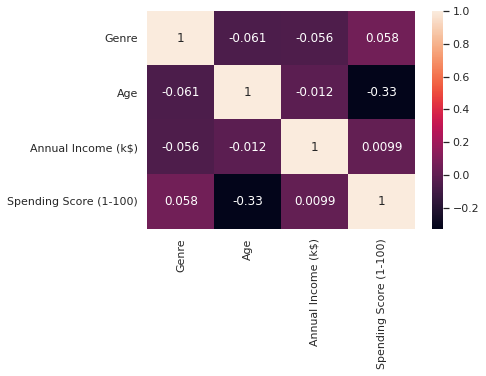

In [4]:
sns.heatmap(data.corr(), annot = True)

In [5]:
gender = pd.DataFrame({
    "Gender": ['Female', 'Male'],
    "Values": [
        data[data['Genre'] == 1].count()[0],
        data[data['Genre'] == 0].count()[0]
    ]})
gender

,Gender,Values
0,Female,112
1,Male,88


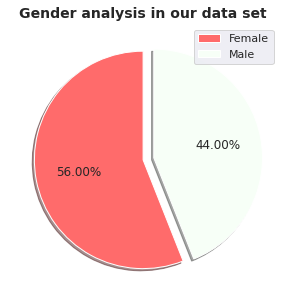

In [6]:
plt.figure(figsize = (6, 5))
plt.pie(gender['Values'],
        colors = ['#FF6B6B', '#F7FFF7'], autopct='%1.2f%%', shadow = True,
        startangle = 90, explode = [0, 0.1])
plt.title('Gender analysis in our data set', fontsize = 14, fontweight = 'bold')
plt.legend(labels = gender['Gender'])
plt.show()

In [7]:
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


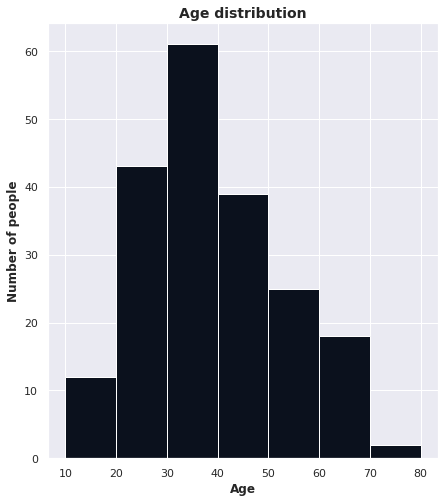

In [8]:
plt.figure(figsize = (7, 8))
plt.hist(data['Age'], bins = range(10, 90, 10), color = '#0B111D')
plt.title('Age distribution', fontsize = 14, fontweight = 'bold')
plt.xlabel('Age', fontsize = 12, fontweight = 'bold')
plt.ylabel('Number of people', fontsize = 12, fontweight = 'bold')
plt.show()

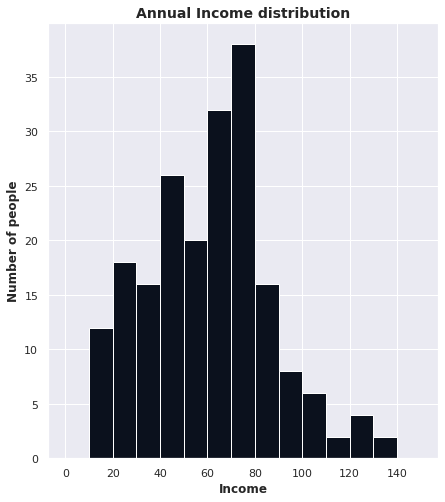

In [9]:
plt.figure(figsize = (7, 8))
plt.hist(data['Annual Income (k$)'], bins = range(0, 160, 10), color = '#0B111D')
plt.title('Annual Income distribution', fontsize = 14, fontweight = 'bold')
plt.xlabel('Income', fontsize = 12, fontweight = 'bold')
plt.ylabel('Number of people', fontsize = 12, fontweight = 'bold')
plt.show()

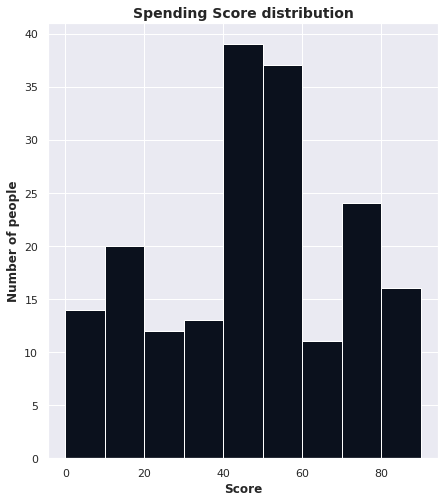

In [10]:
plt.figure(figsize = (7, 8))
plt.hist(data['Spending Score (1-100)'], bins = range(0, 100, 10), color = '#0B111D')
plt.title('Spending Score distribution', fontsize = 14, fontweight = 'bold')
plt.xlabel('Score', fontsize = 12, fontweight = 'bold')
plt.ylabel('Number of people', fontsize = 12, fontweight = 'bold')
plt.show()

In [11]:
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


## Clustering

In [19]:
X = data.iloc[:, 2:4]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [33]:
wcss = []
for i in range(1, len(X)):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcssIter = kmeans.inertia_
    wcss.append(wcssIter)

<ipython-input-33-ccac14fcfcfa>:4: ConvergenceWarning: Number of distinct clusters (196) found smaller than n_clusters (197). Possibly due to duplicate points in X.
  kmeans.fit(X)
<ipython-input-33-ccac14fcfcfa>:4: ConvergenceWarning: Number of distinct clusters (196) found smaller than n_clusters (198). Possibly due to duplicate points in X.
  kmeans.fit(X)
<ipython-input-33-ccac14fcfcfa>:4: ConvergenceWarning: Number of distinct clusters (196) found smaller than n_clusters (199). Possibly due to duplicate points in X.
  kmeans.fit(X)


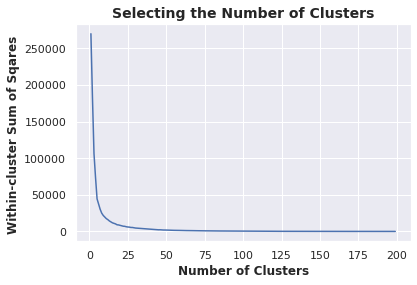

In [38]:
numClusters = range(1, len(X))
plt.plot(numClusters, wcss)
plt.title('Selecting the Number of Clusters', fontsize = 14, fontweight = 'bold')
plt.xlabel('Number of Clusters', fontsize = 12, fontweight = 'bold')
plt.ylabel('Within-cluster Sum of Sqares ', fontsize = 12, fontweight = 'bold')
plt.show()

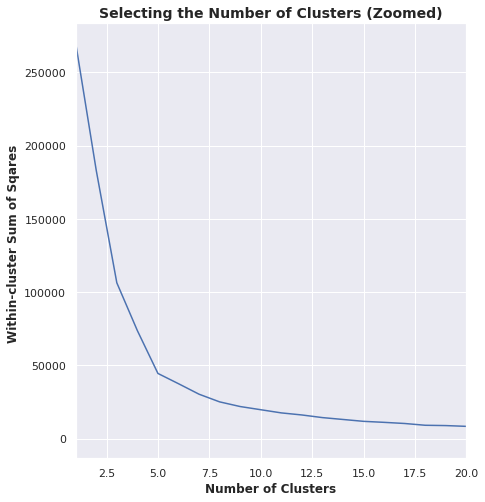

In [45]:
plt.figure(figsize = (7, 8))
numClusters = range(1, len(X))
plt.plot(numClusters, wcss)
plt.title('Selecting the Number of Clusters (Zoomed)', fontsize = 14, fontweight = 'bold')
plt.xlabel('Number of Clusters', fontsize = 12, fontweight = 'bold')
plt.xlim(left = int(1), right = int(20))
plt.ylabel('Within-cluster Sum of Sqares ', fontsize = 12, fontweight = 'bold')
plt.show()

In [40]:
kmeans = KMeans(7)
kmeans.fit(X)

KMeans(n_clusters=7)

In [41]:
identifiedClusters = kmeans.fit_predict(X)
identifiedClusters

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 5, 6, 5, 6, 5, 6, 5, 6,
       5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 1, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6,
       5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6,
       5, 6, 5, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)

In [42]:
dataWClusters = data.copy()
dataWClusters['Clusters'] = identifiedClusters
dataWClusters.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,0,19,15,39,4
1,0,21,15,81,2
2,1,20,16,6,4
3,1,23,16,77,2
4,1,31,17,40,4


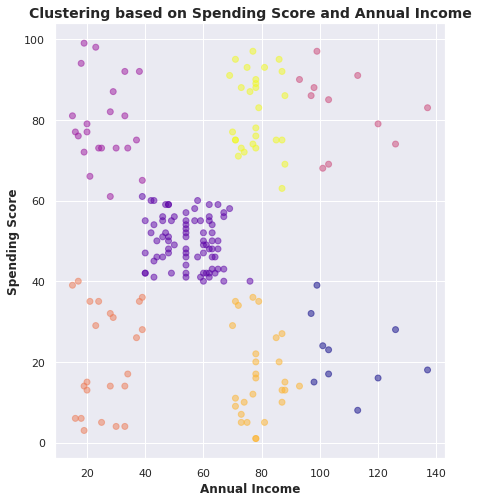

In [46]:
plt.figure(figsize = (7, 8))
plt.scatter(dataWClusters['Annual Income (k$)'],
            dataWClusters['Spending Score (1-100)'],
            c = dataWClusters['Clusters'],
            alpha = 0.5,
            cmap = 'plasma')

plt.title('Clustering based on Spending Score and Annual Income',
          fontsize = 14,
          fontweight = 'bold')
plt.xlabel('Annual Income',
          fontsize = 12,
          fontweight = 'bold')
plt.ylabel('Spending Score',
          fontsize = 12,
          fontweight = 'bold')
plt.show()